<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modulo8_reactor_bioquimico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modulo 8 Reactores bioquímicos

Autor: Juan Manuel 

Fecha: enero 2021

In [1]:
install.packages("rootSolve")
install.packages("FME")
# cargar Grind.R
source("Grind.R")
# cargar librerías 
install.packages("GA")
library(GA)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deSolve’, ‘coda’, ‘minpack.lm’, ‘minqa’


Loading required package: coda



grind.R was sourced


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘RcppArmadillo’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. In this module we developed the modeling equations assuming that no biomass is fed to the reactor, Analyze the system studied for the case where the biomass feed concentration is 2.5% of the substrate feed concentration (so xf = 0.1 for the numerical values used in this module). Is there still the possibility of a washout steady-state?

In [2]:
# establecer modelo con xf 
monod <- function(times, state,parms) {
        with(as.list(c(state, parms)), {
                
                # velocidad de crecimiento 
                rx = mu_max*s/(ks + s)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rx
                
                # balance de materia para el sustrato
                dsdt = D*(sf - s) - rs
                
                # balance de materia para la biomasa
                dxdt = D*(xf - x) + rx
                
                return(list(c(dsdt,dxdt)))
        })
}

In [3]:
# establecer parámetros
p <- c(mu_max = 0.53, ks = 0.12, Yxs = 0.4, sf = 4, xf = 0.1, D = 2)

In [4]:
# establecer condiciones iniciales 
s <- c(s = 1, x = 1)

In [5]:
# tiempo de integración
times <- seq(0,100,len=100)

In [6]:
# resolver EDOs
out <- ode(y = s,times = times,func = monod,parms = p,method = "rk4")

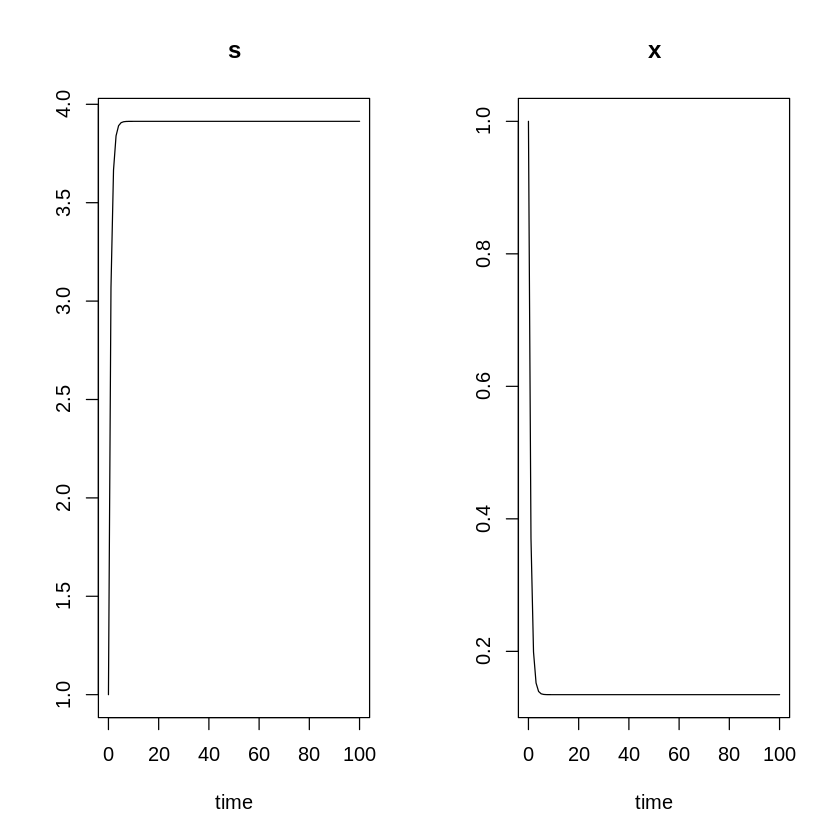

In [7]:
plot(out)

In [8]:
tail(out)

,time,s,x
"[95,]",94.94949,3.913474,0.1346105
"[96,]",95.95960,3.913474,0.1346105
"[97,]",96.96970,3.913474,0.1346105
"[98,]",97.97980,3.913474,0.1346105
"[99,]",98.98990,3.913474,0.1346105
"[100,]",100.00000,3.913474,0.1346105


Inclusive con $D = 2$ existe biomasa en el equilibrio

        s         x 
3.9134737 0.1346105 
Stable point, eigenvalues:  -2 -1.487084 


s         x 
3.9134737 0.1346105

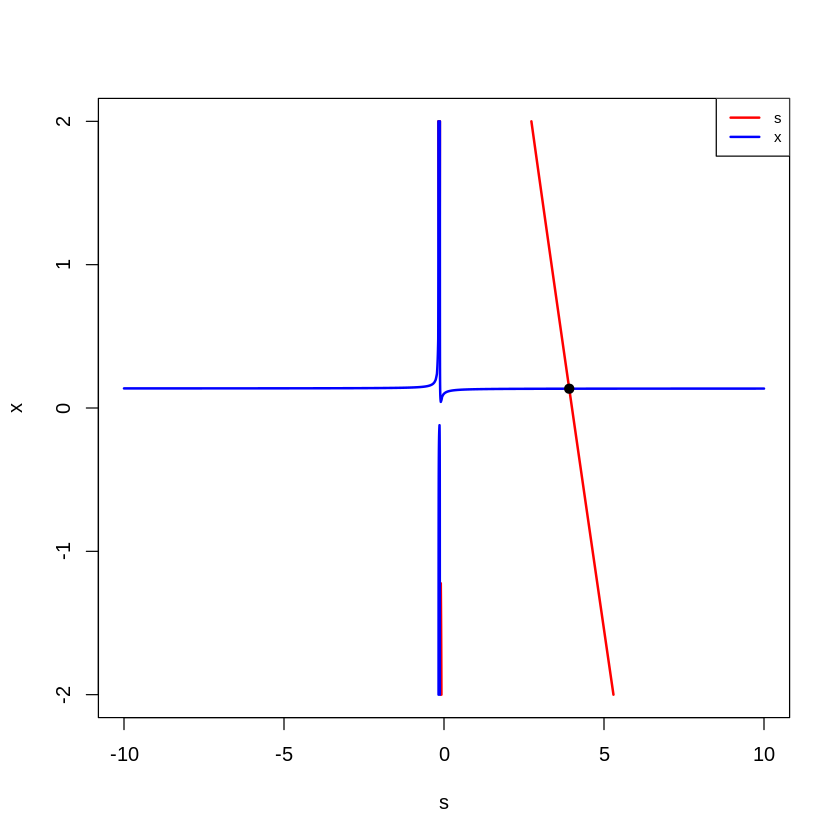

In [9]:
# plano de fase
par(mfrow = c(1,1))
plane(xmin = -10,xmax = 10,ymin = -2,ymax = 2, odes = monod)
newton(state = c(s=5, x = 0), odes = monod, plot = T)

          s           x 
 4.35252069 -0.04100828 
Unstable point, eigenvalues:  0.3661058 -0.15 


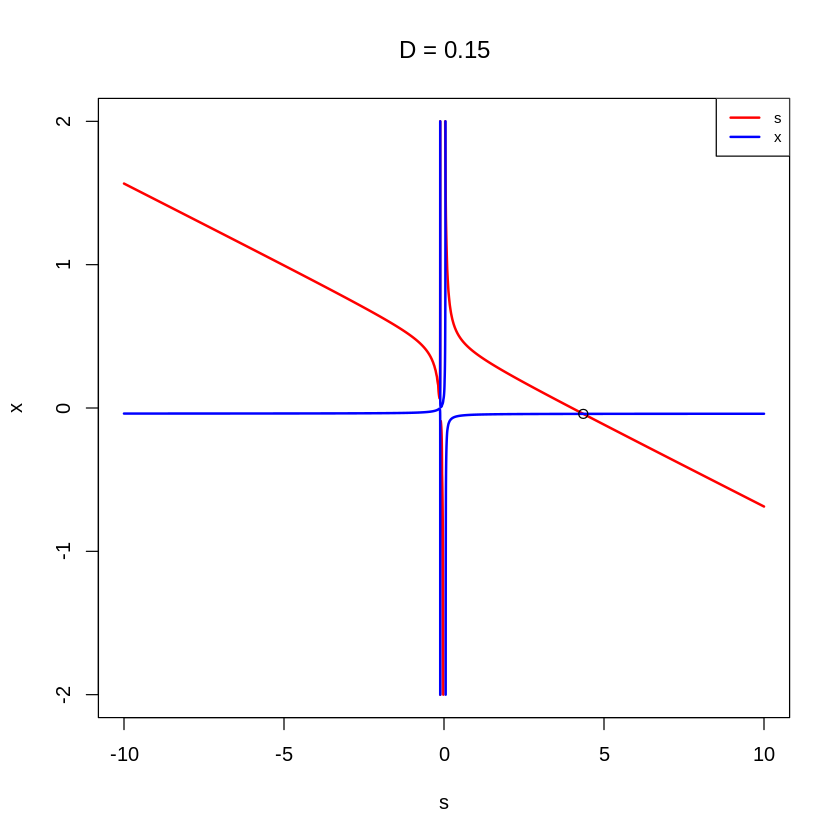

        s         x 
3.7361181 0.2055528 
Stable point, eigenvalues:  -1 -0.4886912 


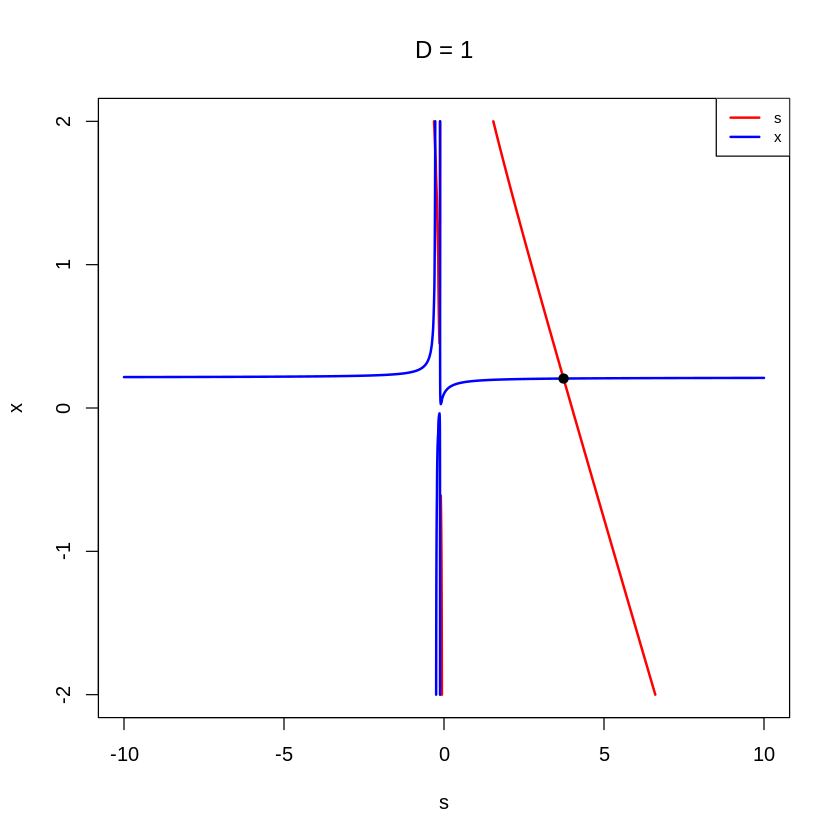

        s         x 
3.9134737 0.1346105 
Stable point, eigenvalues:  -2 -1.487084 


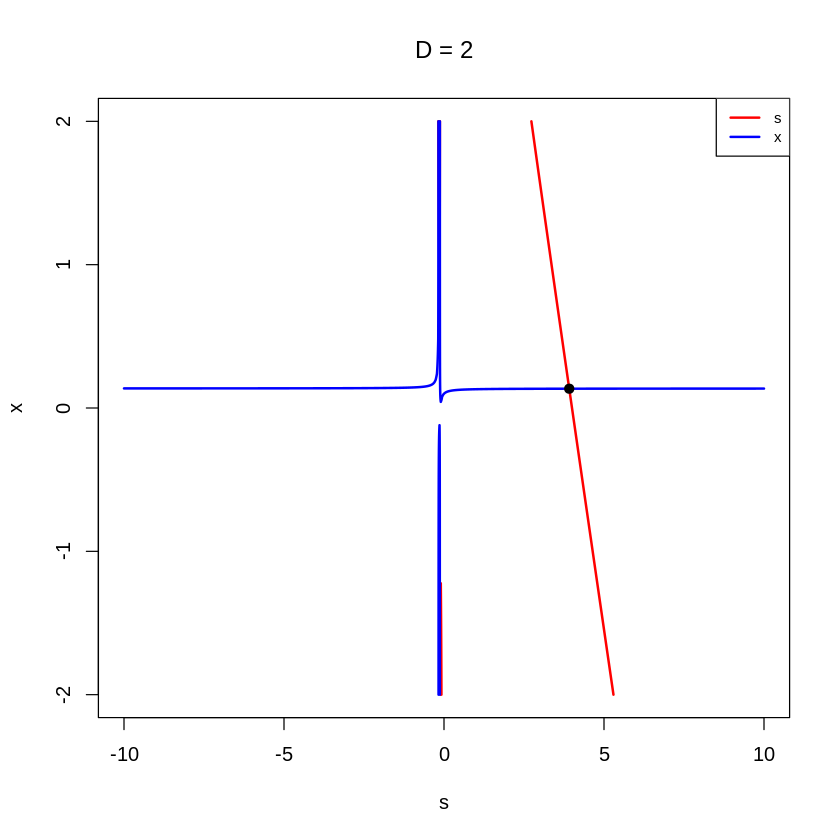

        s         x 
3.9864395 0.1054242 
Stable point, eigenvalues:  -10 -9.486482 


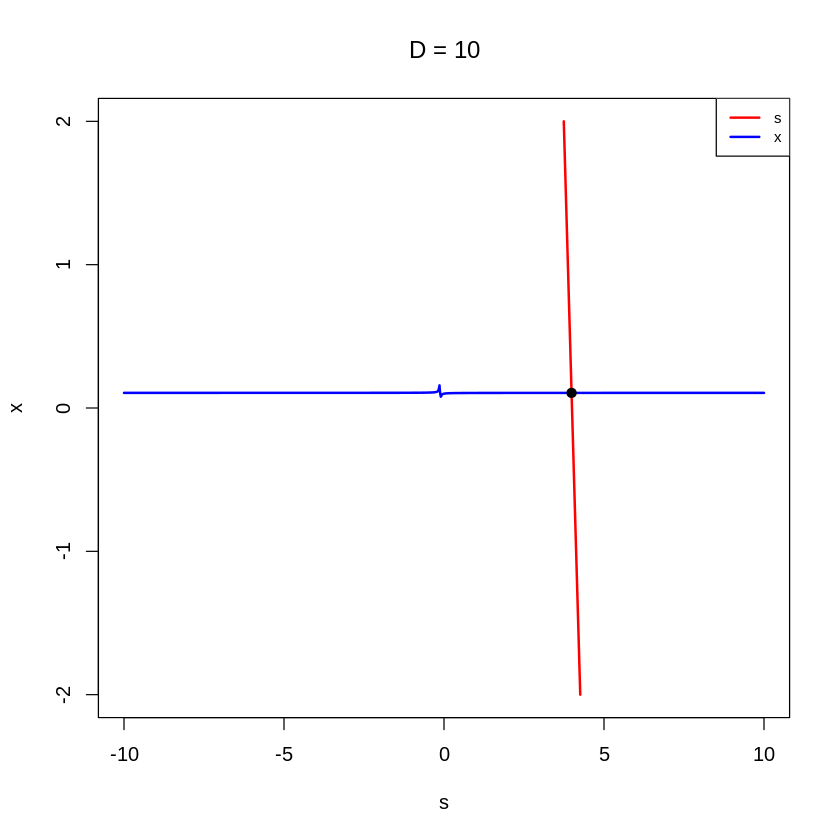

In [10]:
# estudair efecto del parámetro D
for (D in c(0.15,1,2,10)) {
        p["D"] <- D
        plane(xmin = -10,xmax = 10,ymin = -2,ymax = 2, 
              main = paste0("D = ", D), odes = monod)
        newton(state = c(s = 5, x = 0), plot = T, odes = monod)
}

Aun con $D = 10$ existe biomasa en el equilibrio. Supongo ha dejado de existir el equilibrio trivial con $x = 0$

2. Modify bio_phas_gen.mn and bio.mn to perform a phase-plane analysis for cases 2 and 3 with the substrate inhibition model

In [11]:
# modelo de inhibición por sustrato 
inhibition <- function(times, state,parms) {
        with(as.list(c(state, parms)), {
                
                # velocidad de crecimiento 
                rx = mu_max*s/(ks+ s + ki*s^2)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rx
                
                # balance de materia para el sustrato
                dsdt = D*(sf - s) - rs
                
                # balance de materia para la biomasa
                dxdt = -D*x + rx
                
                return(list(c(dsdt,dxdt)))
        })
}

In [12]:
# establecer parámetros
p <- c(mu_max = 0.53, ks = 0.12, Yxs = 0.4, sf = 4, D = 0.3, ki = 0.4545)

In [13]:
# establecer condiciones iniciales 
s <- c(s = 1, x = 1)

In [14]:
# tiempo de integración
times <- seq(0,100,len=100)

In [15]:
# resolver EDOs
out <- ode(y = s,times = times,func = inhibition,parms = p,method = "rk4")

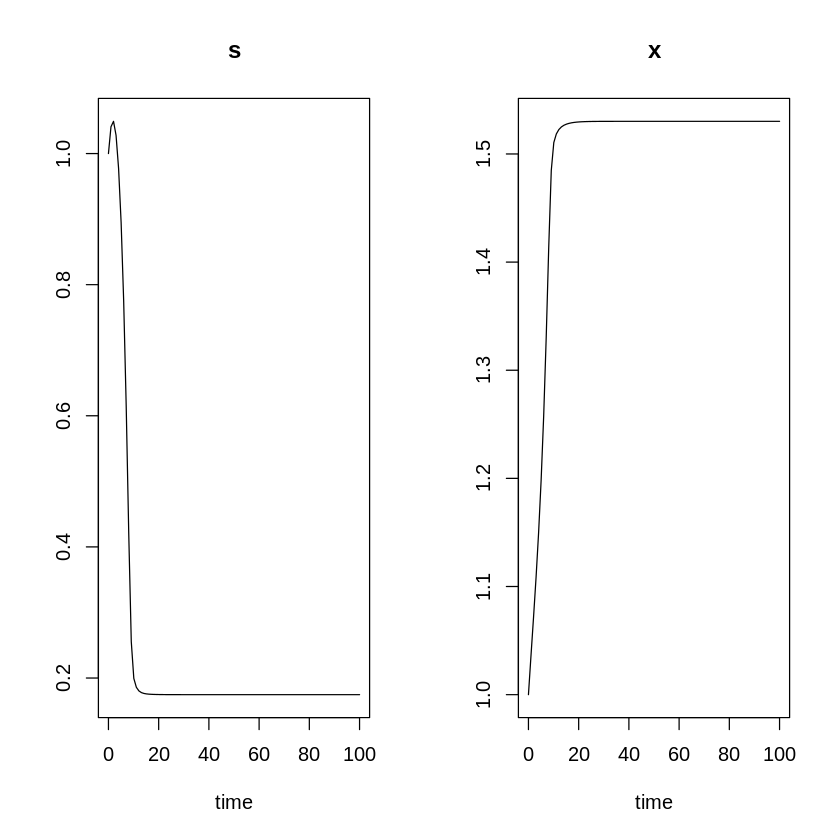

In [16]:
# mostrar resultados 
plot(out)

         s          x 
0.04777796 1.58088882 
Stable point, eigenvalues:  -8.743852 -0.15 
           s            x 
4.000000e+00 1.874825e-08 
Unstable point, eigenvalues:  -0.15 0.03609551 
         s          x 
 5.5261128 -0.6104451 
Stable point, eigenvalues:  -0.15 -0.02919147 


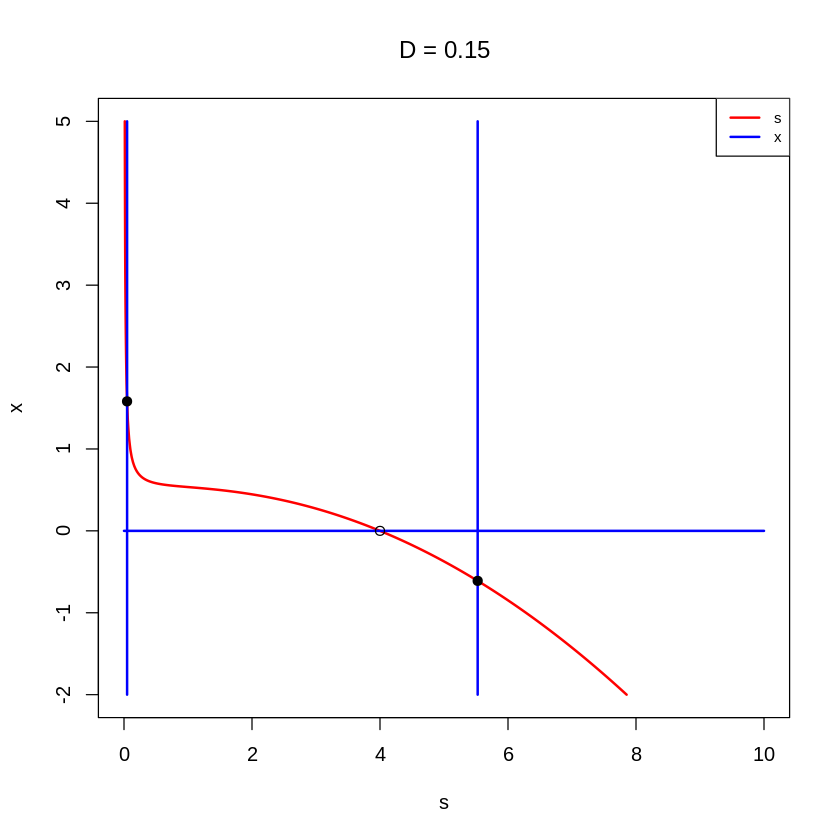

        s         x 
0.1745926 1.5301630 
Stable point, eigenvalues:  -2.262012 -0.3 
       s        x 
1.512243 0.995103 
Unstable point, eigenvalues:  -0.3 0.169836 
s x 
4 0 
Stable point, eigenvalues:  -0.3 -0.1139045 


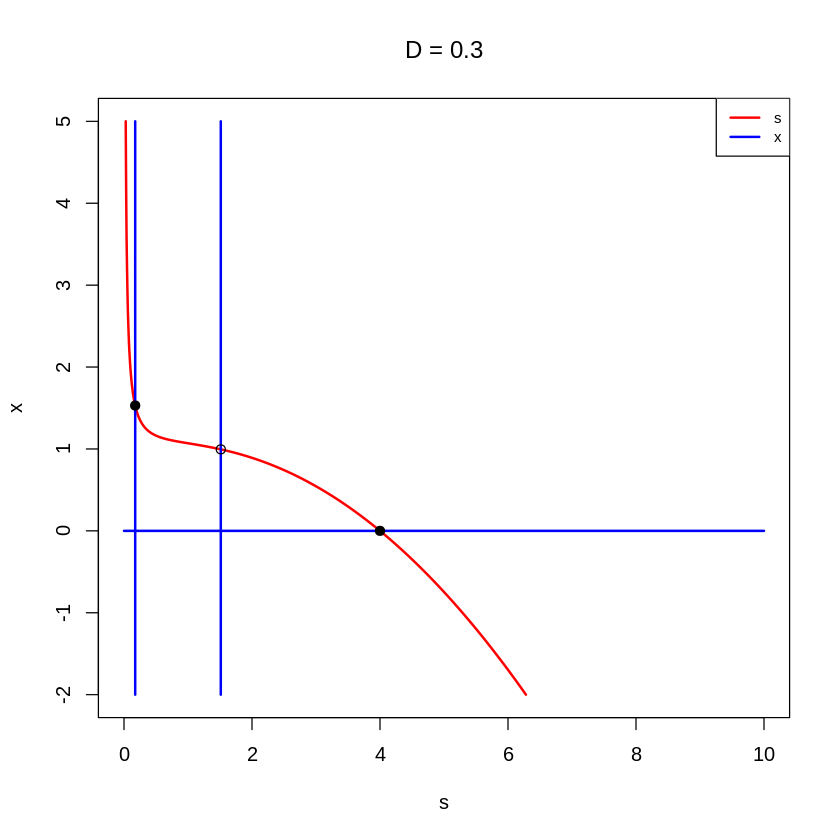

s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 
s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 
s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 


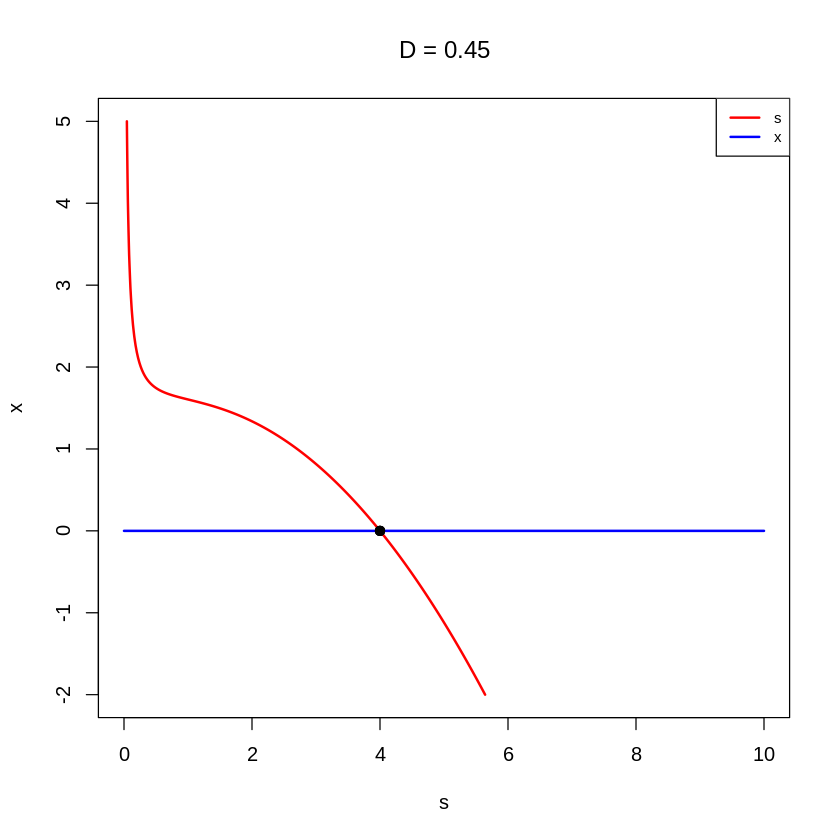

In [17]:
# plano de fase para los tres escenarios que plantean 
# estudair efecto del parámetro D
par(mfrow = c(1,1))
for (D in c(0.15,0.3,0.45)) {
        p["D"] <- D
        plane(xmin = 0,xmax = 10,ymin = -2,ymax = 5, 
              main = paste0("D = ", D), odes = inhibition)
        #run(traject = T)
        newton(state = c(s = 0, x = 5), plot = T, odes = inhibition)
        newton(state = c(s = 3, x = 1), plot = T, odes = inhibition)
        newton(state = c(s = 20, x = -1), plot = T, odes = inhibition)
}

Data for specific growth rate coefficient as a function substrate concentration for a biochemical reactor are shown below:

| s (g/L) | $\mu\ (h^{-1})$|
|:---:|:---:|
|0|0|
|0.1|0.38|
|0.25|0.54|
|0.5|0.63|
|0.75|0.66|
|1|0.68|
|1.5|0.70|
|3|0.73|
|5|0.74|

a. Estimate the parameter values for a Monod model $(k_{s},\ \mu_{max})$

In [18]:
# modelo de Monod
monod <- function(s,x) {

    mu_max = x[1]
    ks = x[2]

    mu = mu_max*s/(ks + s)

    out <- data.frame(s = s, mu = mu)

    return(out)
}

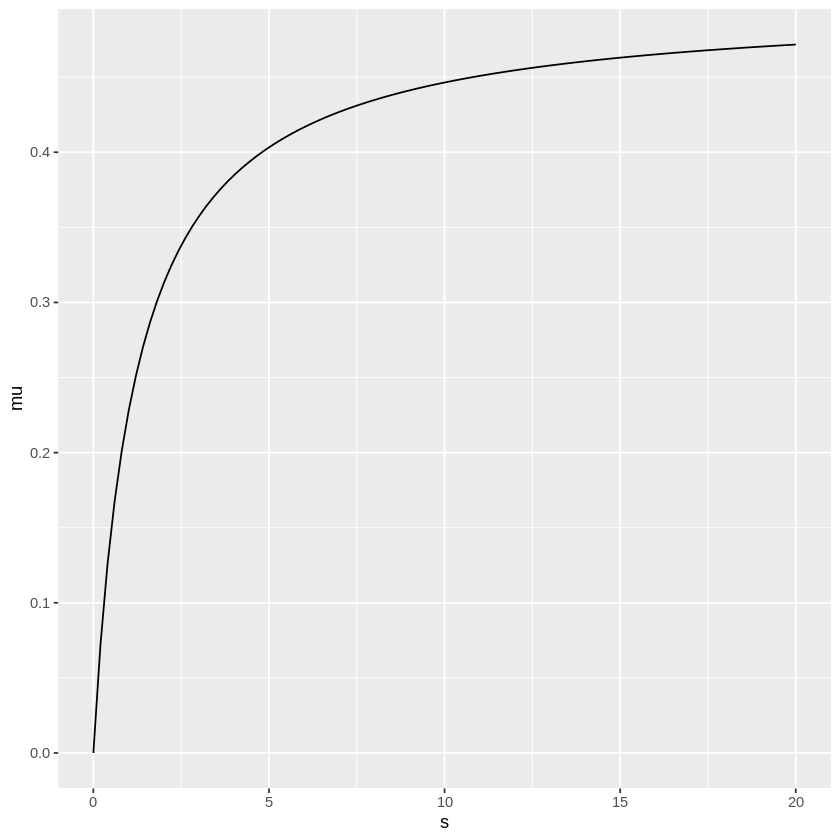

In [19]:
# probar modelo 
s <- seq(0,20,len=100)
ggplot(monod(s,c(0.5,1.2)), aes(s,mu)) +
  geom_line()

In [20]:
# establecer función objetivo 
cost <- function(x, data) {
  out <- monod(s = s, x = x)
  cost <- modCost(model = out, obs = data, x = "s")$model
  return(-cost)
}

In [21]:
# guardar datos 
data <- data.frame(s = c(0,0.1,0.25,0.5,0.75,1,1.5,3,5), mu = c(0,0.38,0.54,0.63,0.66,0.68,0.70,0.73,0.74))

In [22]:
head(data)

,s,mu
,<dbl>,<dbl>
1,0.00,0.00
2,0.10,0.38
3,0.25,0.54
4,0.50,0.63
5,0.75,0.66
6,1.00,0.68


In [23]:
# probar función de costo
cost(x = c(0.5,1.2), data = data)

[1] -1.415645

In [24]:
# optimización paramétrica con GA
GA <- ga(type = "real-value", 
          fitness = cost ,
          data = data, 
          lower = c(0,0), 
          upper = c(2,2), 
          maxiter = 10, names = c("mu_max", "ks"))

In [25]:
print(GA@solution)[1,]

        mu_max        ks
[1,] 0.8307872 0.1967961


mu_max        ks 
0.8307872 0.1967961

In [26]:
# realizar simulación con s experimental y parámetros óptimos  
out <- monod(data$s, print(GA@solution)[1,])
head(out)

        mu_max        ks
[1,] 0.8307872 0.1967961


,s,mu
,<dbl>,<dbl>
1,0.00,0.0000000
2,0.10,0.2799185
3,0.25,0.4648582
4,0.50,0.5961481
5,0.75,0.6581042
6,1.00,0.6941761


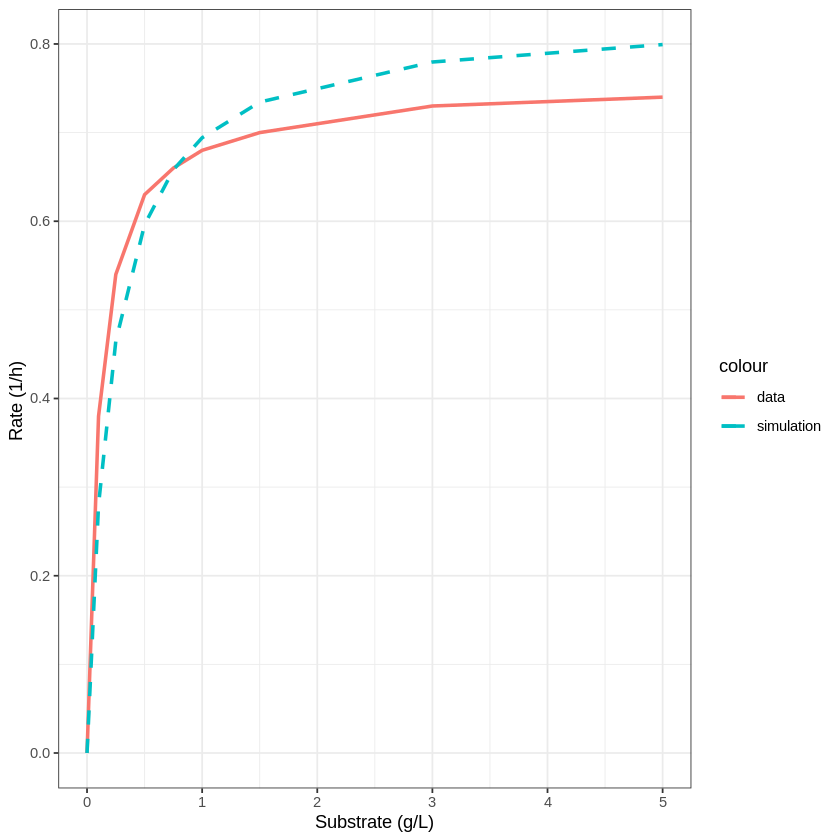

In [27]:
# comparar resultados de simulación con parámetros óptimos y datos experimentales
ggplot(data, aes(s)) +
    geom_line(aes(y=mu, color = "data"), lwd = 1, lty = 1) +
    geom_line(data = out, aes(y = mu, color = "simulation"), lwd = 1, lty = 2) +
    ylab("Rate (1/h) ") +
    xlab("Substrate (g/L)") +
    theme_bw()

Vemos que el ajuste es bueno 

b. The production rate of cells (biomass) is $Dx$. Find the steady-slale value of the dilution rate that maximi7.es the production rate of cells. The substrate feed concentration is 5 g/L.

En este problema tenemos que definir la función a optimizar

$$G(D) = D \bar{x} $$

Considerando que 

$$\bar{x} = Y_{xs} (s_f - \bar{s})$$

y

$$\bar{s} = \frac{D k_s}{\mu_{max} - D}$$

Tenemos 


$$G(D) = D Y_{xs} (s_f - \frac{D k_s}{\mu_{max} - D}) $$

El problema es encontrar el valor $D_{opt}$ que nos permita maximizar $G(D)$ dado que 

| parámetro | valor |
|:---:|:---:|
| $Y_{xs}$ | 0.4 |
| $sf$ | 5 g/L |
| $\mu_{max}$ | 0.56 1/h |
| $k_s$ | 0.2 g/L |

In [28]:
# cambiar valor de sf 
p["sf"] <- 5

In [44]:
# definir función objetivo 
gain1 <- function(p, x) {
  with(as.list(p),{

      G = x*Yxs*(sf - ks*x/(mu_max - x))

      return(G)
  })
}

In [45]:
# probar función objetivo 
gain1(p, 0.5)

[1] 0.6

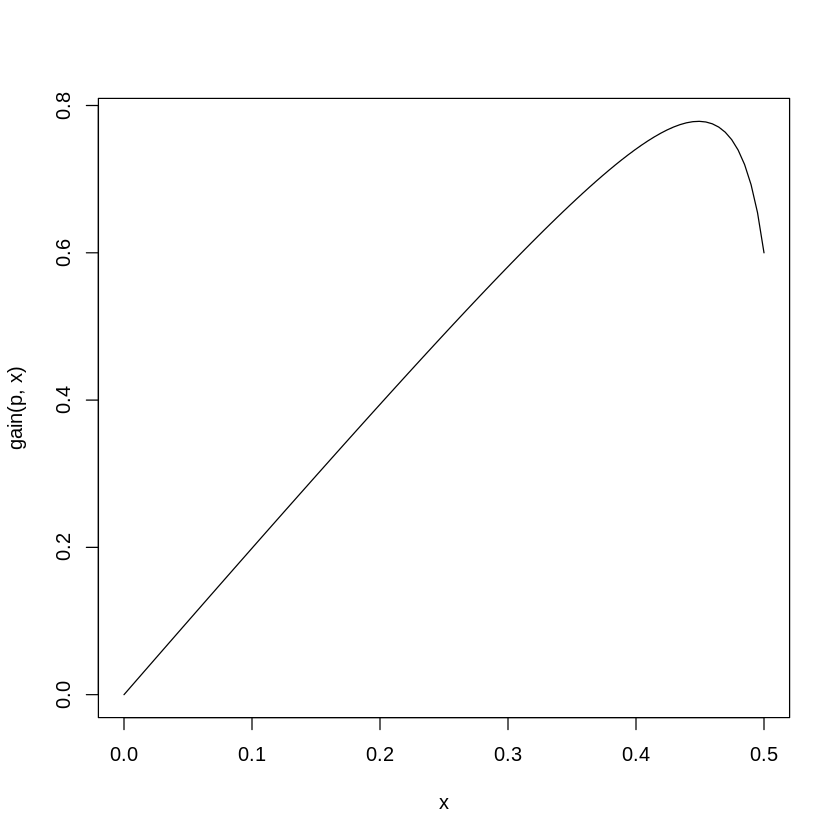

In [31]:
# graficar función objetivo 
x <- seq(0,0.5,len=100)
plot(x, gain(p,x), type = "l")

In [32]:
# función auxiliar para la optimización
gain2 <- function(x) {
  out <- gain(p = p,x)
  return(-out)
}

In [33]:
# optimizar con optimise()
sol <- optimise(f = gain2, lower = 0,upper = 0.5)
print(sol)

$minimum
[1] 0.4488652

$objective
[1] -0.7785332



El valor de $D$ que permite generar una máxima producción de biomasa es $D_{opt} = 0.448\ h^{-1}$ co lo que se obtiene $m_x = 0.778\ g/L$ 

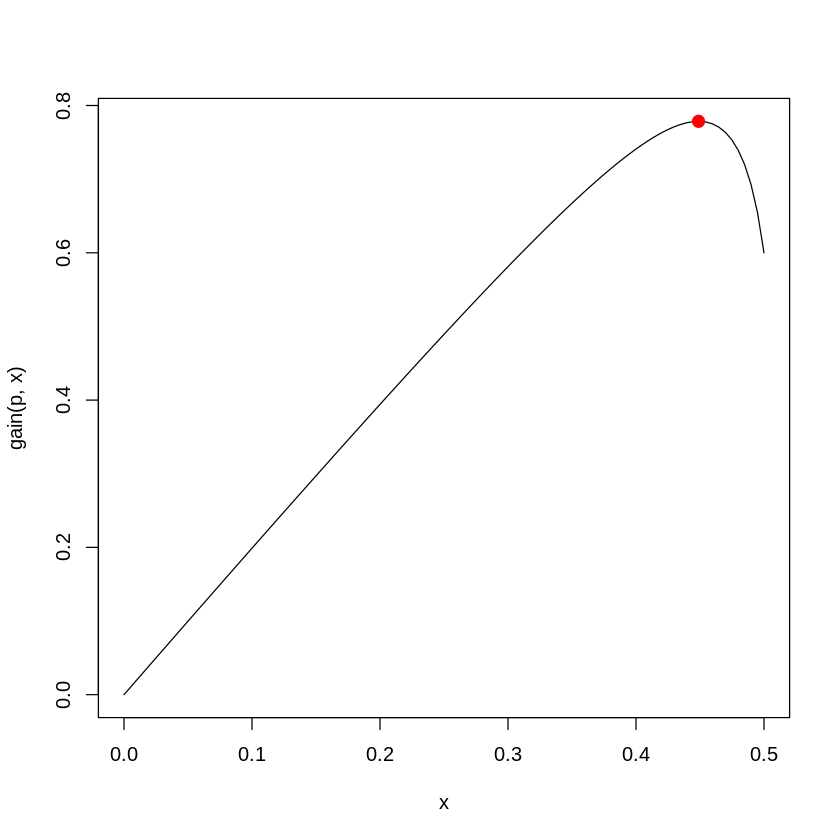

In [34]:
# mostrar resultados 
x <- seq(0,0.5,len=100)
plot(x, gain(p,x), type = "l")
points(sol$minimum, -sol$objective, pch = 20, col = "red", cex = 2)

c. Find the steady-state concentration of biomass and substrate at this dilution rate.

Para hacer esto de manera más general, creamos un función que regrese los puntos de equilibrio para cualquier valor $D$

In [35]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
  with(as.list(p), {

    # primer punto de equilibrio
    s = sf
    x = 0
    ss1 = c(s = s, x = x)

    # segundo punto de equilibrio
    s = D*ks/(mu_max - D)
    x = Yxs*(sf-s)
    ss2 = c(s = s, x = x)

  return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3)))
  })
}

In [46]:
p["D"] <- sol$minimum
print(p)
ss1 <- steady_state(p)
print(ss1)

   mu_max        ks       Yxs        sf         D        ki 
0.5300000 0.1200000 0.4000000 5.0000000 0.4488652 0.4545000 
$ss1
s x 
5 0 

$ss2
    s     x 
0.664 1.734 



De acuerdo con la salida anterior si $D = 0.448862\ h^{-1}$, entonces $\bar{x} = 1.734\ g/L$. Por lo tanto 

$$G(D) = D \bar{x} = 0.448862\ h^{-1} * 1.734\ g/ = 0.7878 g/h $$

Lo cual concuerda con los resultados obtenidos de la optimización 

4. In this module we have analyzed how the biomass and suhstrate concentrations change depending on the dilution rate. If the purpose of a particular biochemical reactor is to produce cells, then we are more concerned with the production rate of cells. The production rate is mass of cells produced per unit time:

$$steady-state\ production\ rate\ of\ cells\ =\ D \bar{x}$$

For both the Monod and substrate inhibition models presented this modale, find the dilution rate that maximizes the production rate of cells. Analyze the stability of the reactor under this condition

Esto ya lo hicimos para el modelo de Monod por sustrato del problema anterior. A continuación lo hacemos para el modelo de inhibición por sustrato 

In [55]:
p["sf"] <- 4 # regresar a sf a su valor original 

In [56]:
# establecer función objetivo 
gain3 <- function(x, p) {
  with(as.list(p), {

    s_bar = (-(1-mu_max/x) - sqrt((1-mu_max/x)^2 - 4*ki*ks))/(2*ki)

    x_bar = Yxs*(sf - s_bar)

    G = x*x_bar

    return(G)

  })
}

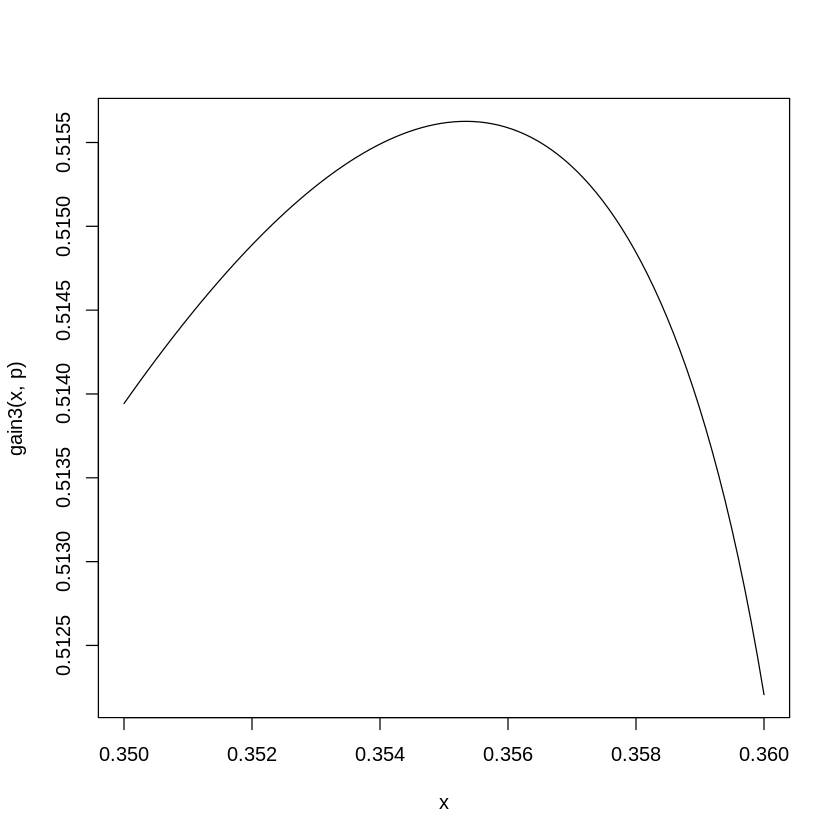

In [60]:
# valores de D a evaluar
x <- seq(0.35,0.36,len=100)
# mostrar resultados 
plot(x, gain3(x,p), type = "l")

In [69]:
# función auxiliar para la optimización
gain4 <- function(x) {
  out <- gain3(p = p,x)
  return(-out)
}

In [70]:
# optimizar con optimise()
sol2 <- optimise(f = gain4, lower = 0.35,upper = 0.36)
print(sol2)

$minimum
[1] 0.355336

$objective
[1] -0.5156261



El valor de $D$ que permite obtener una máximo flujo de biomasa es $D = 0.355\ h^{-1}$ con lo cual se obtiene $\dot{m}_x = 0.5156\ g/h$

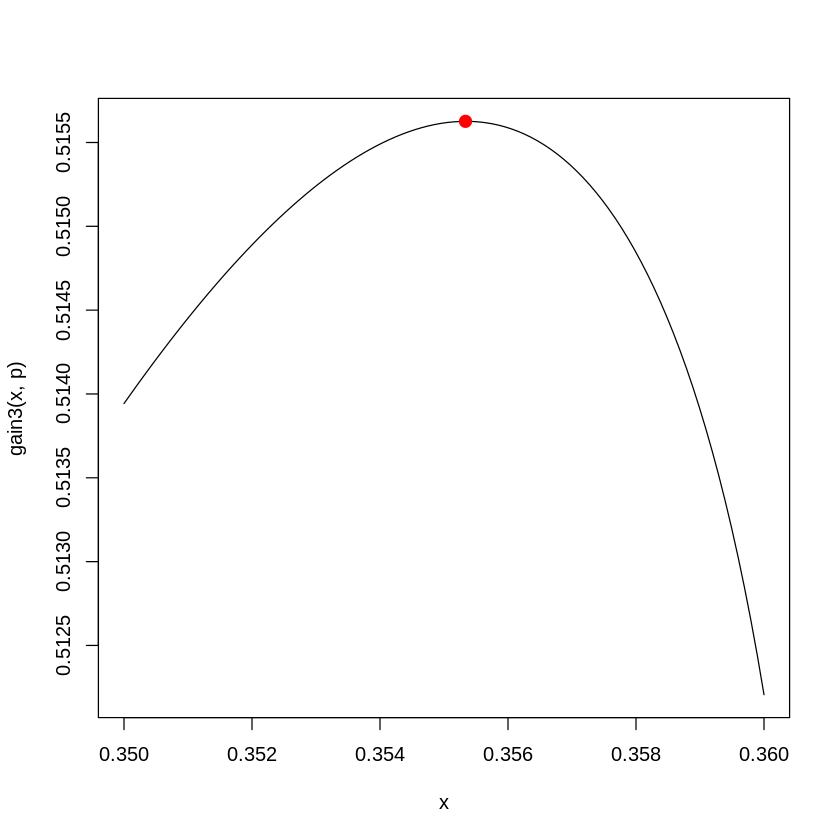

In [74]:
# mostrar resultados 
x <- seq(0.35,0.36,len=100)
plot(x, gain3(x, p), type = "l")
points(sol2$minimum, -sol2$objective, pch = 20, col = "red", cex = 2)

5. Consider a biochemical reactor where the consumption of substrate ($s$) promotes the growth of biomass ($x$) and formation of product ($p$). The three modeling equations are: 

$$\frac{dx}{dt} = (\mu(s,p) - D) x$$

$$\frac{ds}{dt} = D(s_f - s) - \frac{\mu(s,p) x}{Y_{xs}}$$

$$\frac{dp}{dt} = -Dp + (\alpha \mu(s,p) + \beta)x$$

where the specific growth rate is a function of both the biomass concentration and the product concentration:

$$\mu(s,p) = \mu_{max} \frac{1-\frac{p}{p_m}}{k_m + s + ki s^2}$$

with the following values:

| variable | value | variable | value |
|:---:|:---:|:---:|:---:|
| $Y_{xs}$ | 0.4 g/g | $\alpha$ | 2.2 g/g|
| $\beta$ | 0.2 1/h | $\mu_{max}$ | 0.48 1/h |
| $p_m$ | 50 g/L | $k_s$ | 1.2 g/L |
| $k_i$ | 0.04545 L/g | $s_f$ | 20 g/L |
| $D$ | 0.202 1/h | x | 6g/L |
| $s$ | 5g/L | $p$ | 19.14 g/L |

a. Compare and contrast this model with that of the two-state model with substrate inhibition kinetics presented in this module

In [119]:
# establecer valor de parámetros 
p <- c(Yxs = 0.4, alpha = 2.2, beta = 0.2, mu_max = 0.48, 
        pm = 50, ks = 1.2, ki = 0.04545, sf = 20, D = 0.202)

In [120]:
# condiciones de equilibrio 
ss_bar <- c(s = 5, x = 6, p = 19.14)

In [121]:
# establecer condiciones iniciales
s <- c(s=1, x = 1)

In [122]:
# simular modelo de inhibición por sustrato 
out1 <- ode(func = inhibition, y = s, times = times, parms = p, method = "rk4")

In [123]:
# modelo con inhibición por sustrato y producto 
prod_inhi <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento 
    rx = mu_max*s/(ks + s)*x

    # velocidad de consumo de sustrato
    rs = (1/Yxs)*rx

    # velocidad de generación de producto debido al crecimiento 
    rp = alpha*rx

    # balance de materia para la biomasa
    dxdt = rx - D*x

    # balance de materia para el sustrato
    dsdt = D*(sf-s) - rs

    # balance de materia para el producto 
    dpdt = rp + beta*x - D*p

    return(list(c(dsdt, dxdt, dpdt)))
  })
}

In [124]:
# simular modelo con inhibición por sustrato y producto 
s <- c(s = 1, x = 1, p = 0)
out2 <- ode(func = prod_inhi, y = s, times = times, parms = p, method = "rk4")

In [153]:
# preparar resultados para la visualización
out1 <- as.data.frame(out1)
out1$s_bar <- ss_bar[1]
out1$x_bar <- ss_bar[2]
out1$p_bar <- ss_bar[3]
out2 <- as.data.frame(out2)

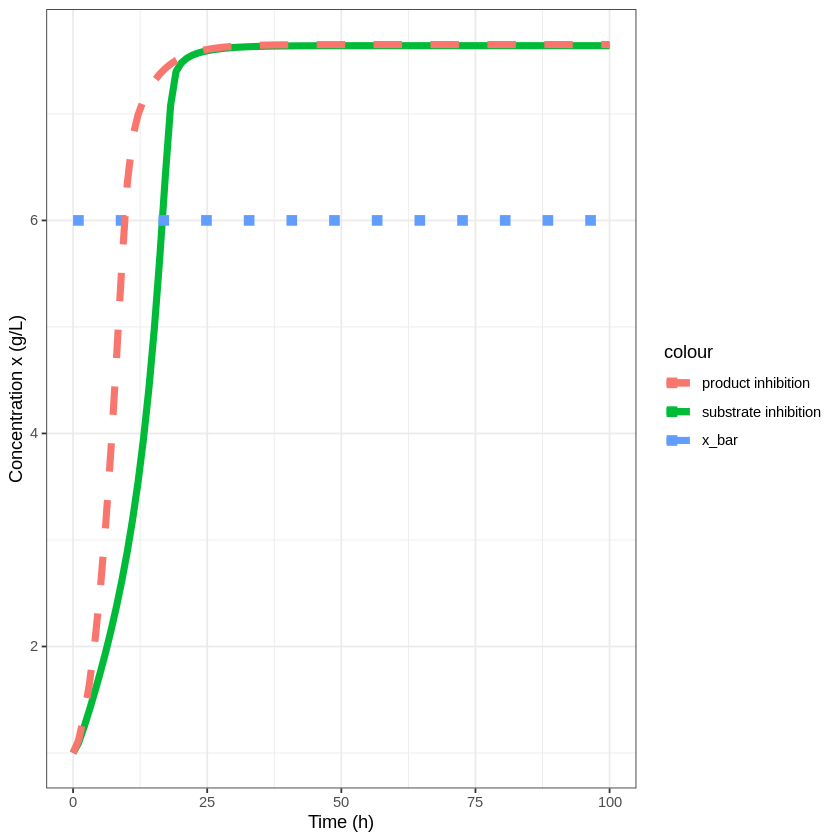

In [126]:
ggplot(out1, aes(times)) +
  geom_line(aes(y = x, color = "substrate inhibition"), lty = 1, lwd = 2) +
  geom_line(aes(y = x_bar, color = "x_bar"), lty = 3, lwd = 3) +
  geom_line(data = out2, aes(y = x, color = "product inhibition"), cex = 2, lty =2) +
  xlab("Time (h)") +
  ylab("Concentration x (g/L)") +
  theme_bw()

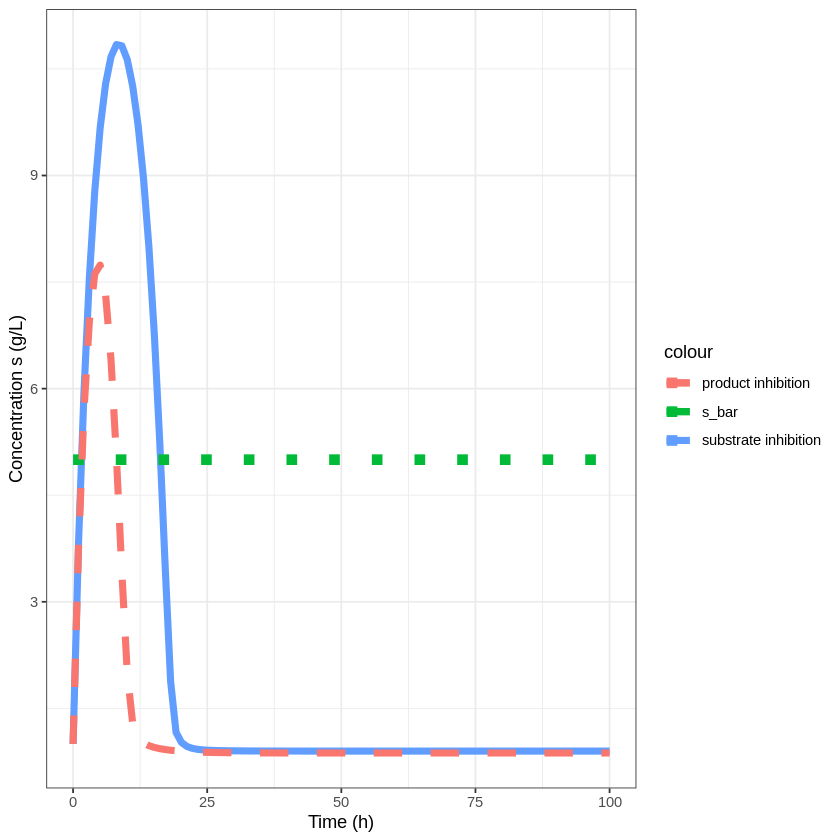

In [159]:
ggplot(out1, aes(times)) +
  geom_line(aes(y = s, color = "substrate inhibition"), lty = 1, lwd = 2) +
  geom_line(aes(y = s_bar, color = "s_bar"), lty = 3, lwd = 3) +
  geom_line(data = out2, aes(y = s, color = "product inhibition"), cex = 2, lty =2) +
  xlab("Time (h)") +
  ylab("Concentration s (g/L)") +
  theme_bw()

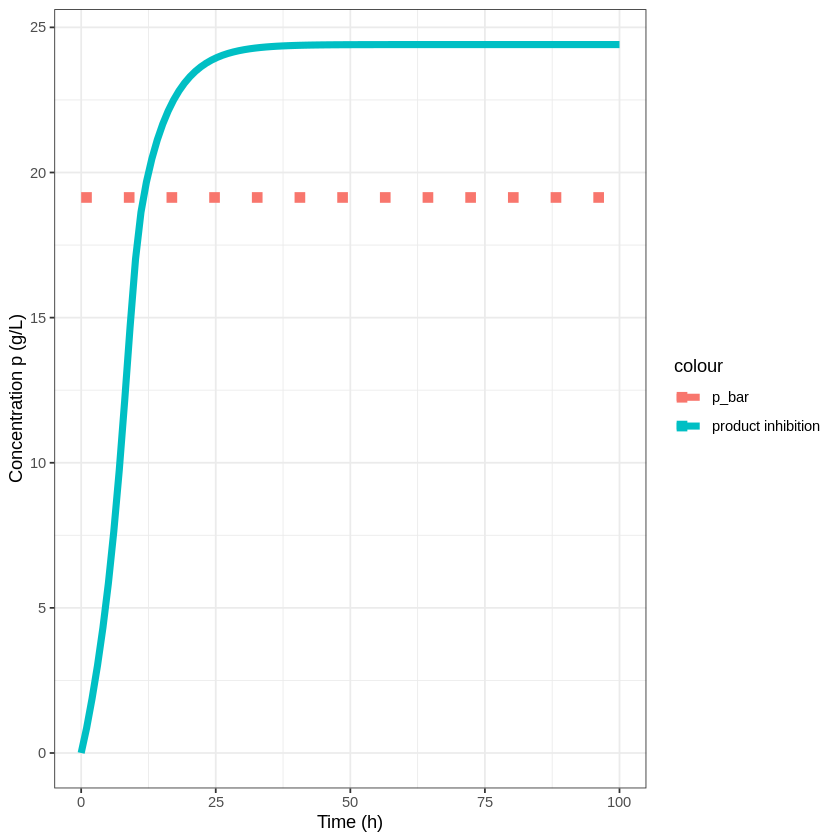

In [158]:
ggplot(out2, aes(times)) +
  geom_line(aes(y = p, color = "product inhibition"), lwd = 2, lty =1) +
  geom_line(data = out1, aes(y = p_bar, color = "p_bar"), lty = 3, lwd = 3) +
  xlab("Time (h)") +
  ylab("Concentration p (g/L)") +
  theme_bw()

b. Verify that the steady-state values for x1, x2, and x3 presented in the table above are correct. For a steady-state input of $D = 0.202$ (and all of the other parameters constant), are there any additional solutions for the states (for example, the trivial solution?). Analyze the stability of all steady~state solutions obtained.

Como se puede observar en la gráfica, los valor de estado estable del libro y los valores obtenidos con el conjunto de parámetros dados en el libro no concuerdan. Debe haber algún error en el libro 

 s  x  p 
20  0  0 
Unstable point, eigenvalues:  0.2508302 -0.202 -0.202 


s  x  p 
20  0  0

         s          x          p 
 0.8719424  7.6512230 24.4081590 
Stable point, eigenvalues:  -2.566481 -0.202 -0.202 


s          x          p 
 0.8719424  7.6512230 24.4081590

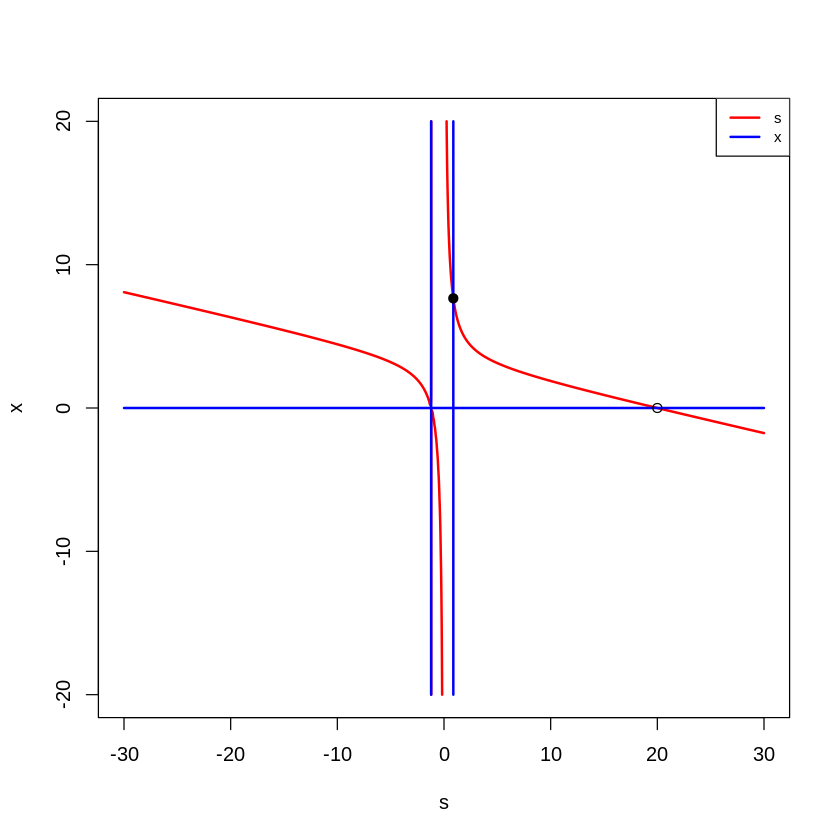

In [163]:
# análisis de plano de fase para el modelo con inhibición por sustrato y producto 
plane(odes = prod_inhi, xmin = -30,xmax = 30, ymin =-20 , ymax = 20) 
newton(state = c(s = 20, x = 0, p = 0), plot = T, odes = prod_inhi)  
newton(state = c(s = 0, x = 7, p = 24), plot = T, odes = prod_inhi)

Como se puede apreciar en la gráfica de arriba, hay tres puntos de equilibrio para $D = 0.202$. El equilibrio estable $(s = 0.8719, x = 7.6512, p = 24.408)$, el equilibrio trivial inestable $(s = 20, x = 0, p = 0)$ y otro equilibrio cuyo valor y estabilidad no se logran apreciar del todo. De cualquier manera este último punto de equilibrio no es físicamente factible. 